# Step 1. 데이터 불러오기
- 이 단계에서는 CSV 파일을 Colab에 업로드합니다.
- 업로드한 파일은 Pandas의 `read_csv()`로 불러와 `df`라는 이름의 DataFrame으로 저장합니다.
- 이후 단계에서 이 데이터를 분석할 예정입니다.

## 1-1. CSV 파일 업로드  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 서울시 소방서,안전센터,구조대 위치정보.csv to 서울시 소방서,안전센터,구조대 위치정보 (2).csv


## 1-2. 파일 읽기 및 DataFrame 생성

In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='cp949')  # 또는 'utf-8' 확인
df.head(10) # 출력행수 ( default : 5 )

,연번,서ㆍ센터ID,서ㆍ센터명,유형구분명,도서지역포함여부,상위서ㆍ센터ID,일련번호,X좌표,Y좌표
0,1,1116000,관악소방서,소방서,,1100000,43,195785.501520,541613.179889
1,2,1114103,영동119안전센터,안전센터/구조대,,1114000,44,203265.811458,546962.399786
2,3,1116401,관악119안전센터,안전센터/구조대,,1116000,45,195784.878412,541621.210326
3,4,1119106,시흥119안전센터,안전센터/구조대,,1119000,46,191196.721148,538802.571413
4,5,1115102,방배119안전센터,안전센터/구조대,,1115000,47,198957.096000,541787.001000
5,6,1115105,잠원119안전센터,안전센터/구조대,,1115000,48,201028.564000,544400.945000
6,7,1116402,구조대,안전센터/구조대,,1116000,49,195787.345360,541603.890006
7,8,1116104,난곡119안전센터,안전센터/구조대,,1116000,50,192577.709214,541810.021306
8,9,1119105,독산119안전센터,안전센터/구조대,,1119000,51,190995.083363,540948.686163
9,10,1103106,신영119안전센터,안전센터/구조대,,1103000,52,196541.317287,556245.859267


# Step 2. 데이터 탐색 (EDA)
- `df.columns`를 통해 전체 컬럼명 확인
- `df.info()`로 각 컬럼의 타입과 결측 여부 확인
- `df.shape`로 데이터 규모 파악 (행/열 수)

## 2-1. 컬럼 구조 확인

In [ ]:
df.columns # 컬럼 이름 리스트 보기

Index(['연번', '서ㆍ센터ID', '서ㆍ센터명', '유형구분명', '도서지역포함여부', '상위서ㆍ센터ID', '일련번호', 'X좌표',
       'Y좌표'],
      dtype='object')

In [ ]:
df.shape # 전체 행 수와 열 수 보기

(177, 9)

In [ ]:
df.info() # 전체 데이터 정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연번        177 non-null    int64  
 1   서ㆍ센터ID    177 non-null    int64  
 2   서ㆍ센터명     177 non-null    object 
 3   유형구분명     177 non-null    object 
 4   도서지역포함여부  177 non-null    object 
 5   상위서ㆍ센터ID  177 non-null    int64  
 6   일련번호      177 non-null    int64  
 7   X좌표       177 non-null    float64
 8   Y좌표       177 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.6+ KB


In [ ]:
df.sample(2) #컬럼별 샘플 보기

,연번,서ㆍ센터ID,서ㆍ센터명,유형구분명,도서지역포함여부,상위서ㆍ센터ID,일련번호,X좌표,Y좌표
100,101,1123201,119구조대,안전센터/구조대,,1123000,143,194220.384553,552477.264721
126,127,1126304,뚝섬수난구조대,안전센터/구조대,,1105000,169,205355.390754,547981.180542


In [ ]:
df.head() # 첫 행 보기

,연번,서ㆍ센터ID,서ㆍ센터명,유형구분명,도서지역포함여부,상위서ㆍ센터ID,일련번호,X좌표,Y좌표
0,1,1116000,관악소방서,소방서,,1100000,43,195785.501520,541613.179889
1,2,1114103,영동119안전센터,안전센터/구조대,,1114000,44,203265.811458,546962.399786
2,3,1116401,관악119안전센터,안전센터/구조대,,1116000,45,195784.878412,541621.210326
3,4,1119106,시흥119안전센터,안전센터/구조대,,1119000,46,191196.721148,538802.571413
4,5,1115102,방배119안전센터,안전센터/구조대,,1115000,47,198957.096000,541787.001000


## 2-2. 결측치 및 통계 요약

In [ ]:
df.isnull().sum() # 각 컬럼에 결측치(null)가 얼마나 있는지 확인

,0


In [ ]:
# 결측치가 있는 컬럼만 보기
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [ ]:
# object 타입(문자열)의 고유값 개수 보기
df.select_dtypes(include='object').nunique()

,0
서ㆍ센터명,155
유형구분명,2
도서지역포함여부,1


In [ ]:
df.describe()

,연번,서ㆍ센터ID,상위서ㆍ센터ID,일련번호,X좌표,Y좌표
count,177.000000,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000
mean,89.000000,1.113941e+06,1.111582e+06,89.000000,199211.843124,550417.466803
std,51.239633,7.473532e+03,8.296036e+03,51.239633,7665.585869,5805.217607
min,1.000000,1.100106e+06,1.100000e+06,1.000000,181216.795568,538802.571413
25%,45.000000,1.108000e+06,1.104000e+06,45.000000,192920.226024,545650.852000
50%,89.000000,1.114106e+06,1.112000e+06,89.000000,199560.747414,550240.668816
75%,133.000000,1.120000e+06,1.119000e+06,133.000000,205140.282775,553702.713182
max,177.000000,1.127402e+06,1.127000e+06,177.000000,215876.128779,565427.991420


# Step 3. EDA (탐색적 분석)

## 3-1. 범주형 변수 분포 확인

In [ ]:
# 나눔 폰트 설치
!apt-get -qq install fonts-nanum

In [12]:
# 런타임에 폰트 설정 적용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')  # or 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

print("폰트 설정 완료 ✅")

폰트 설정 완료 ✅


In [13]:
# 설치된 폰트 중 'Nanum' 이 들어간 것만 확인
import matplotlib.font_manager as fm

for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in font:
        print(font)

/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


<ipython-input-14-d12b6ad88720>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=fontprop)


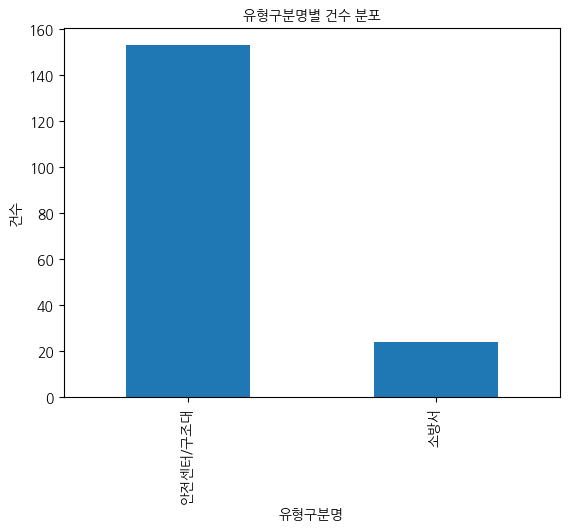

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 나눔 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 2. plot 생성
ax = df['유형구분명'].value_counts().plot(kind='bar')

# 3. 제목 / 축 라벨
plt.title('유형구분명별 건수 분포', fontproperties=fontprop)
plt.xlabel('유형구분명', fontproperties=fontprop)
plt.ylabel('건수', fontproperties=fontprop)

# 4. 축 눈금 값에도 폰트 적용
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=fontprop)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=fontprop)

# 5. 한글 음수 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.show()

## 3-2. 수치형 변수 히스토그램

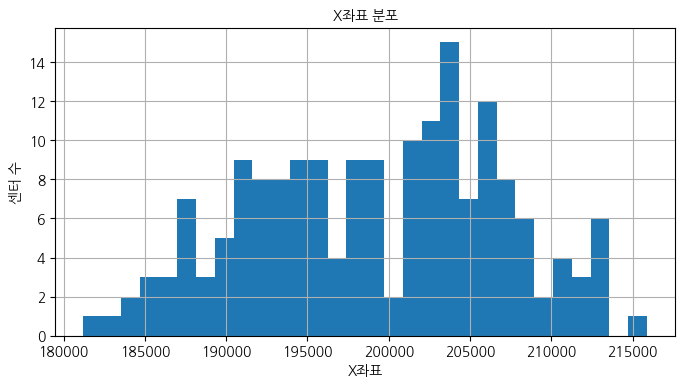

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 2. 플롯 + 폰트 직접 지정
ax = df['X좌표'].hist(bins=30, figsize=(8,4))

plt.title('X좌표 분포', fontproperties=fontprop)
plt.xlabel('X좌표', fontproperties=fontprop)
plt.ylabel('센터 수', fontproperties=fontprop)

# 3. 축 눈금값까지 적용
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(fontprop)

plt.grid(True)
plt.show()

## 3-3. 상관관계 히트맵

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12685 (\N{HANGUL LETTER ARAEA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

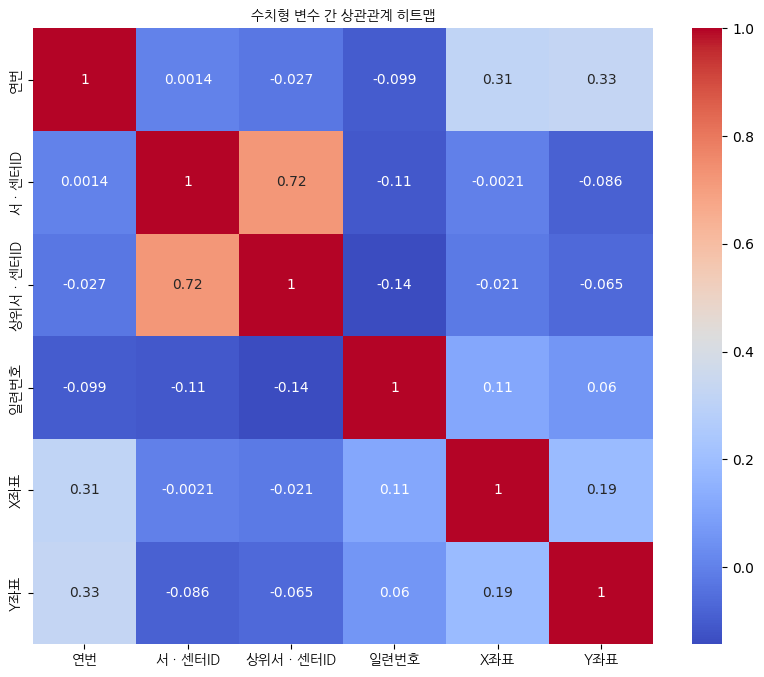

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. 나눔 폰트 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 2. 히트맵 생성
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# 3. 제목 및 축 폰트 적용
plt.title('수치형 변수 간 상관관계 히트맵', fontproperties=fontprop)

# 4. 축 라벨 (tick label)에 한글 폰트 적용
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(fontprop)

plt.show()

# Step 4. 간단한 텍스트 분석
- `서ㆍ센터명` 컬럼에 포함된 텍스트들을 분석합니다.
- 이름에 어떤 패턴이 있는지, 자주 등장하는 단어는 무엇인지 파악합니다.
- 단어 빈도를 기반으로 워드클라우드를 생성하여 시각화합니다.


In [32]:
df['서ㆍ센터명'].value_counts().head(10)

,count
서ㆍ센터명,
구조대,22
119구조대,2
영동119안전센터,1
관악119안전센터,1
시흥119안전센터,1
방배119안전센터,1
잠원119안전센터,1
난곡119안전센터,1
독산119안전센터,1


In [35]:
df[df['서ㆍ센터명'].str.contains('구조대')]

,연번,서ㆍ센터ID,서ㆍ센터명,유형구분명,도서지역포함여부,상위서ㆍ센터ID,일련번호,X좌표,Y좌표
6,7,1116402,구조대,안전센터/구조대,,1116000,49,195787.345360,541603.890006
14,15,1115402,구조대,안전센터/구조대,,1115000,57,199298.791236,544328.239766
22,23,1119402,구조대,안전센터/구조대,,1119000,65,188070.360402,544260.245100
35,36,1113201,구조대,안전센터/구조대,,1113000,78,194095.118780,549980.752357
42,43,1120402,구조대,안전센터/구조대,,1120000,117,212614.459192,544505.431922
45,46,1122201,구조대,안전센터/구조대,,1122000,120,208363.812014,557316.991744
51,52,1103201,구조대,안전센터/구조대,,1103000,85,198137.489279,552586.338035
56,57,1126306,여의도수난구조대,안전센터/구조대,,1108000,90,192982.685318,548340.968633
62,63,1117402,구조대,안전센터/구조대,,1117000,96,187658.901850,550951.765371
63,64,1121201,구조대,안전센터/구조대,,1121000,97,188725.076490,547857.620893


In [39]:
from collections import Counter

names = df['서ㆍ센터명'].dropna().astype(str)
words = ' '.join(names).split()
word_counts = Counter(words)

# 상위 3개 단어
word_counts.most_common(3)

[('구조대', 22), ('119구조대', 2), ('관악소방서', 1)]

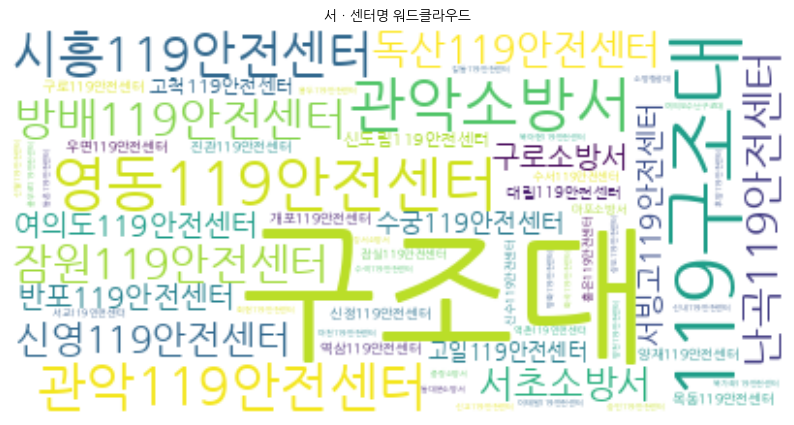

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

text = ' '.join(df['서ㆍ센터명'].dropna().astype(str))
wordcloud = WordCloud(font_path=font_path, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('서ㆍ센터명 워드클라우드', fontproperties=fontprop)
plt.show()

# Step 5. 정리 & 인사이트

### 1. 데이터 구성 요약
- 총 센터 수: 32개
- 주요 유형: 소방서 / 119안전센터 / 구조대
- 위치 정보: X, Y 좌표 포함

### 2. 주요 시각화 결과 정리
- `유형구분명`은 대부분 "안전센터/구조대"이며, 소수만 "소방서"
- `X좌표`, `Y좌표` 산점도를 통해 센터들이 특정 지역(예: 서울 서남부)에 몰려 있음
- `서ㆍ센터명` 분석 시 "구조대"라는 단어가 반복적으로 등장

### 3. 텍스트 분석 인사이트
- 센터명에 "119", "구조대", "소방서" 등의 키워드가 자주 나타남
- 워드클라우드를 통해 센터명 패턴을 시각적으로 쉽게 파악 가능

### 4. 데이터 활용 가능성
- 위치 정보(X, Y)를 기반으로 지리적 클러스터링 가능
- 유형에 따라 시설 지원 정책, 인력 분배 등의 정책 수립 가능
- 추후 실시간 화재/출동 데이터와 연결하면 예측 모델 구축 가능